In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

#Study data files
mouse_metadata_path = './Resources/Mouse_metadata.csv'
study_results_path = './Resources/Study_results.csv'

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a singel DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

#Display the data tables for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [37]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [38]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id = 'g989'

#Retrieve duplicate mouse ID data
dup_mouse_data = combined_data.loc[combined_data["Mouse ID"] == dup_mouse_id, :]
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = combined_data.loc[combined_data["Mouse ID"] != dup_mouse_id, :]
clean_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [40]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = clean_mice_data["Mouse ID"].nunique()
num_clean_mice

248

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean_Tumor_Volume= ('mean'),
    Median_Tumor_Volume= ('median'),
    Tumor_Volume_Variance= ('var'),
    Tumor_Volume_Std_Dev= ('std'),
    Tumor_Volume_Std_Err= ('sem')
).rename(columns={
    "Mean_Tumor_Volume": "Mean Tumor Volume",
    "Median_Tumor_Volume": "Median Tumor Volume",
    "Tumor_Volume_Variance": "Tumor Volume Variance",
    "Tumor_Volume_Std_Dev": "Tumor Volume Std. Dev",
    "Tumor_Volume_Std_Err": "Tumor Volume Std. Err."
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


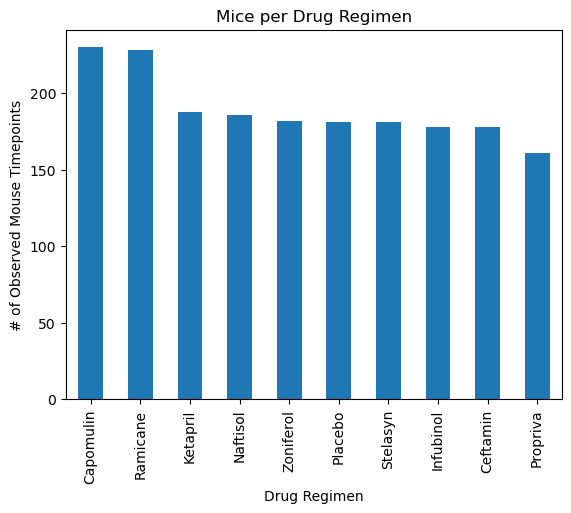

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = combined_data["Drug Regimen"].value_counts()

drug_regimen.plot(kind="bar", title="Mice per Drug Regimen")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()


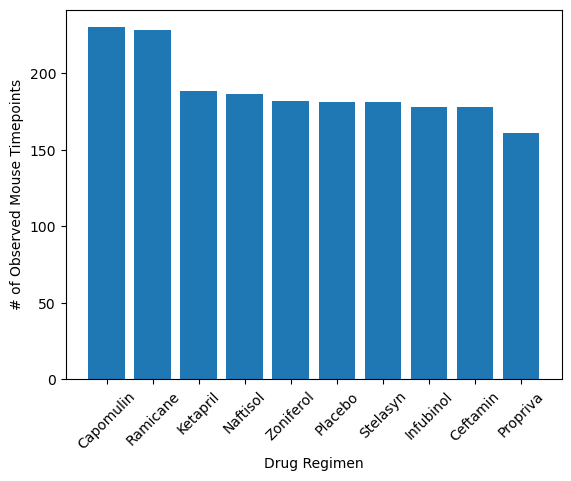

In [50]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of rows for each drug regimen
drug_regimen = combined_data["Drug Regimen"].value_counts()

# Get the drug regimens as labels
labels = drug_regimen.index.tolist()

# Get the count values
counts = drug_regimen.values.tolist()

# Create the bar plot
plt.bar(labels, counts)

# Set the axis label
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Rotate the x-axis labels
plt.xticks(rotation=45)

plt.show()

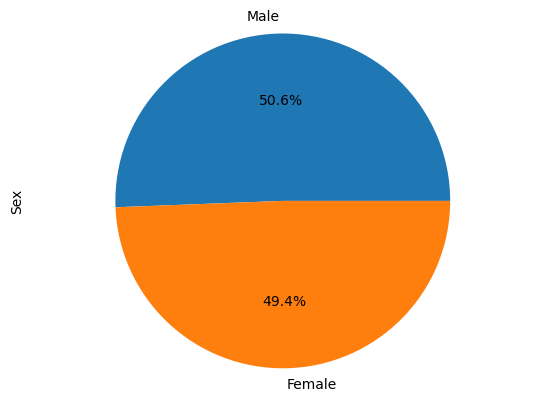

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = combined_data["Sex"].value_counts()

gender_count.plot(kind="pie",autopct="%1.1f%%")

plt.axis("equal")

plt.show()

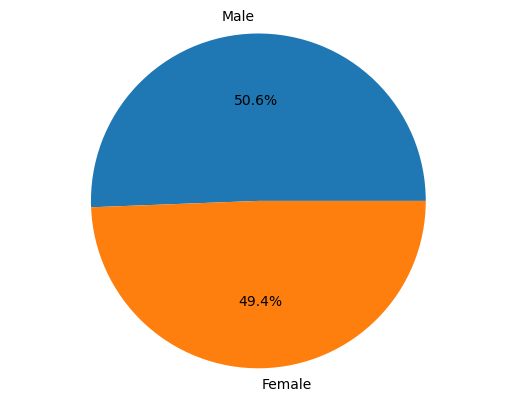

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of male and female mice
gender_counts = combined_data["Sex"].value_counts()

# Create a list of labels for the pie chart
labels = gender_counts.index.tolist()

# Create a list of values for the pie chart
sizes = gender_counts.values.tolist()

# Create the pie plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)

#set axis to be equal so that the pie is circular
plt.axis('equal')

plt.show()

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

filtered_data = combined_data[combined_data["Drug Regimen"].isin(treatment_regimens)]

max_timepoints = filtered_data.groupby("Mouse ID")["Timepoint"].max()

final_tumor_volume = pd.merge(combined_data, max_timepoints, on=["Mouse ID", "Timepoint"])

final_tumor_volume
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatment_regimens:
    tumor_volume = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    
    Q1 = final_tumor_volume['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = final_tumor_volume['Tumor Volume (mm3)'].quantile(0.75)
    median = final_tumor_volume['Tumor Volume (mm3)'].median()
    IQR = Q3 - Q1

    lower_bound =Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    print(f"{regimen}'s potential outliers: ")
    if outliers.empty:
        print(outliers)
    else:
        for index, value in outliers.iteritems():
            print(f"{index}\t{value}")
    print() 
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)



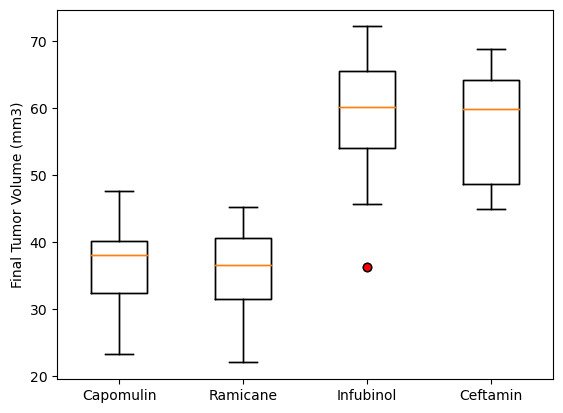

In [31]:
#Generate a box plot that shows the distribution of the tumor volume for each treatment group. 

# Create a list of tumor volumes for each treatment regimen
data = [final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == regimen, "Tumor Volume (mm3)"] for regimen in treatment_regimens]
# Create the box plot
plt.boxplot(data)

plt.boxplot(data, flierprops={'marker': 'o', 'markerfacecolor' : 'red'})

# Set the x-axis tick labels
plt.xticks(range(1, len(treatment_regimens) + 1), treatment_regimens)

# Set the y-axis label
plt.ylabel("Final Tumor Volume (mm3)")

# Display the plot
plt.show()


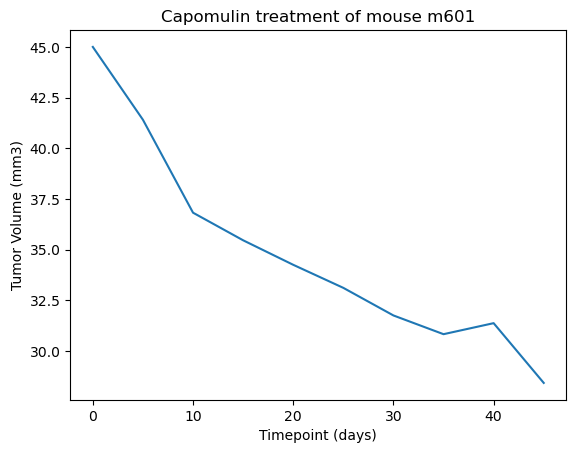

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Mouse ID using Capomulin
mouse_id = "m601"

#Data for the m601 and Capomulin treatment regimen
mouse_data = combined_data.loc[(combined_data["Mouse ID"] == mouse_id) & (combined_data["Drug Regimen"] == "Capomulin")]

# Create the line plot
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], markerfacecolor='blue')

# Set the x-axis label
plt.xlabel("Timepoint (days)")

# Set the y-axis label
plt.ylabel("Tumor Volume (mm3)")

# Set the plot title
plt.title(f"Capomulin treatment of mouse {mouse_id}")

plt.show()

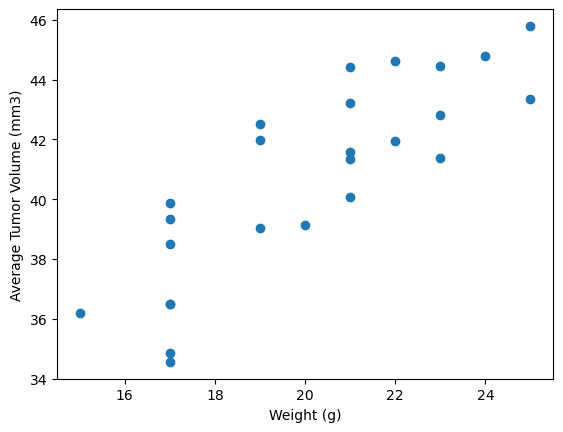

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Weight for each mouse
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

#average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

#Average weight of each mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume)

#Set the x-axis label
plt.xlabel("Weight (g)")

#Set the y-axis label
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

Correlation coefficient: 0.841936342469472
Linear Regression Equation: y =  0.95x +  21.55


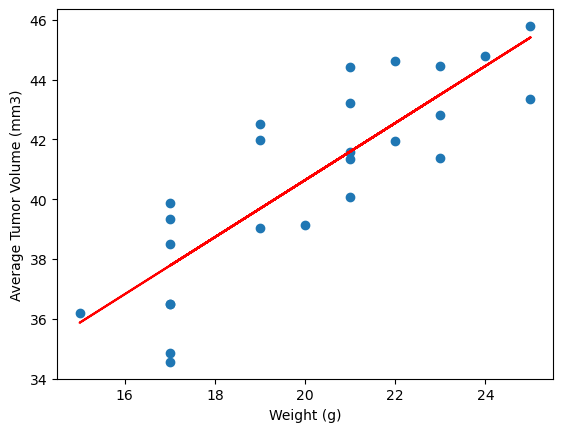

In [34]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(mouse_weight, average_tumor_volume)[0]
print(f"Correlation coefficient: {correlation}")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weight, average_tumor_volume)

# Print the regression equation
print(f"Linear Regression Equation: y = {slope: .2f}x + {intercept: .2f}")

# Plot the scatter plot and regression line
plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()